# Add reference input layers and thier attributes to H3_5 hex layer

The hex layer reference inputs were calculated based on Spatial Join with the "Have their center in" match option.

https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/spatial-join.htm
arcpy.analysis.SpatialJoin(target_features, join_features, out_feature_class, {join_operation}, {join_type}, {field_mapping}, {match_option}, {search_radius}, {distance_field_name}, {match_fields})

See also: "K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_Grid_tb_attrbts.docx" 

 ### Step 1. Adding state and county boundary fields

In [37]:
# Step 1. Add state and county boundary fields to H3_5 grid, Spatial Join with "Have Their Center IN" option.

import arcpy
arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\H3_5",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\tj_2021_us_st_cnt",
    out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping=r'GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,'
                  r'target_features,'
                  r'GRID_ID,0,17;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,'
                  r'target_features,'
                  r'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,'
                  r'target_features,'
                  r'Shape_Area,-1,-1;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,'
                  r'join_features,'
                  r'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,'
                  r'join_features,'
                  r'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,'
                  r'join_features,'
                  r'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,'
                  r'join_features,'
                  r'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,'
                  r'join_features,'
                  r'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,'
                  r'join_features,'
                  r'GEO_ID,0,5',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table= r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)


<Result 'K:\\projects\\rgmg\\\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty'>

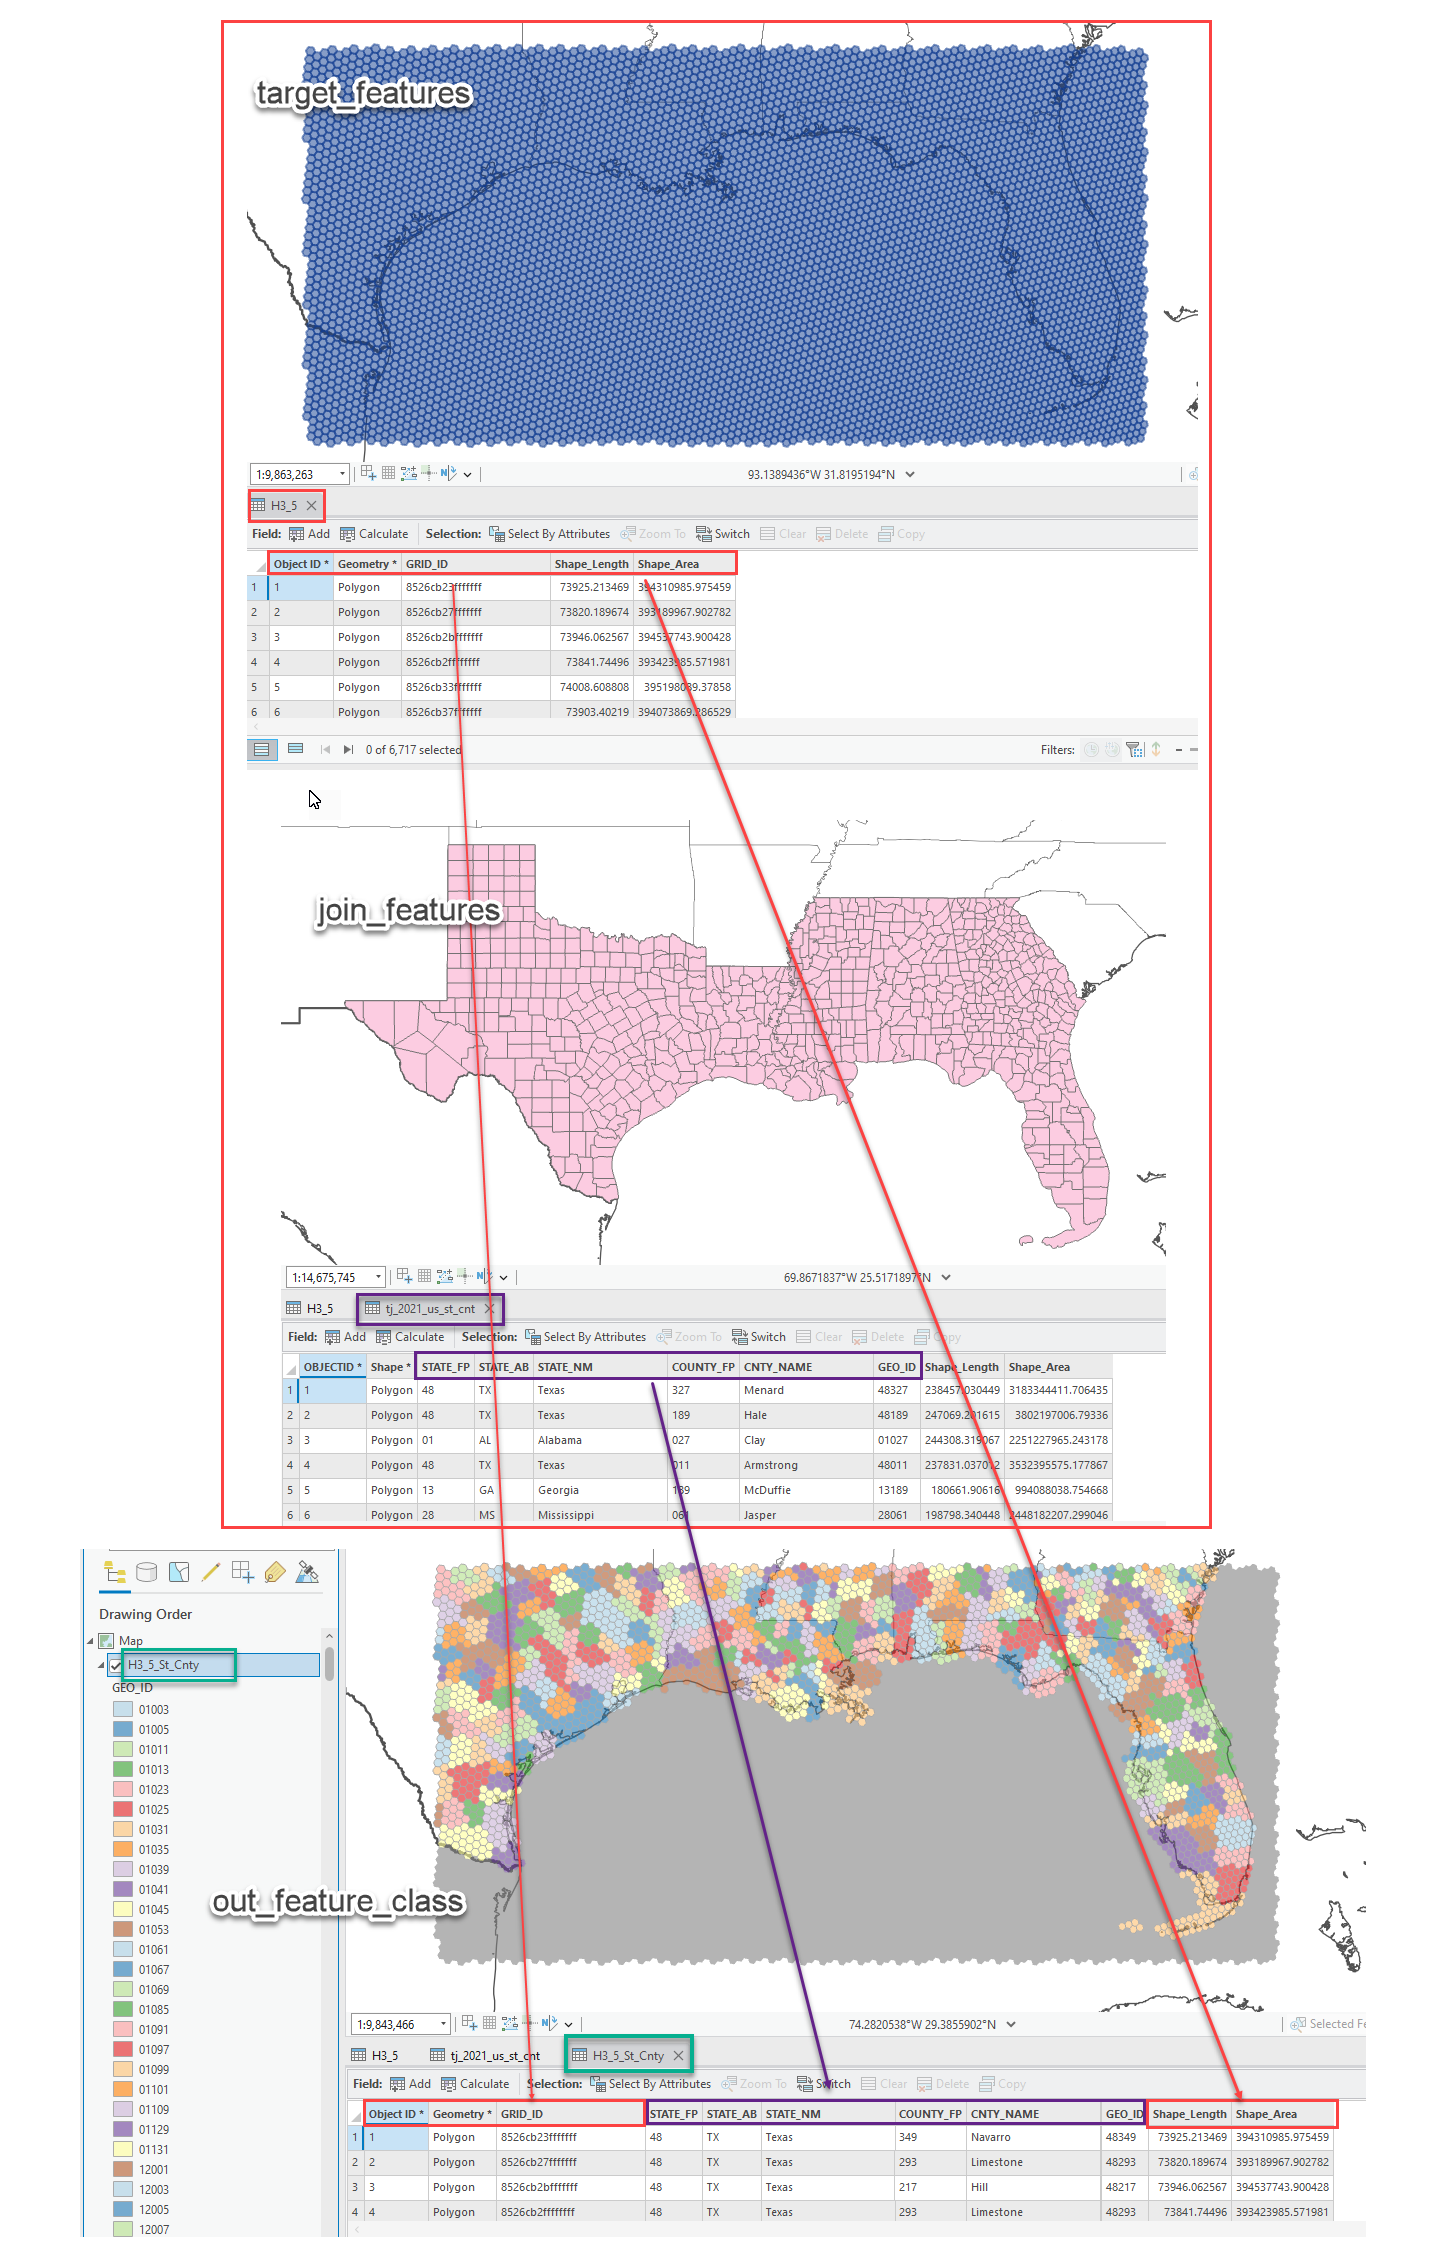

 ### Step 2. Adding estuarine drainage fields

In [38]:
# Step 2. Add estuarine drainage area attributes; target_features file is the output from step 1. 


arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
    join_features= r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\Estuarine_Drainage_Areas",
    out_feature_class=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,H3_5_St_Cnty,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,'
                  'target_features,STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,'
                  'target_features,STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,'
                  'target_features,STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,'
                  'target_features,COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,'
                  'target_features,CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,'
                  'target_features,GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,'
                  'join_features,EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,'
                  'join_features,EDA_NAME,0,100',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)

<Result 'K:\\projects\\rgmg\\\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA'>

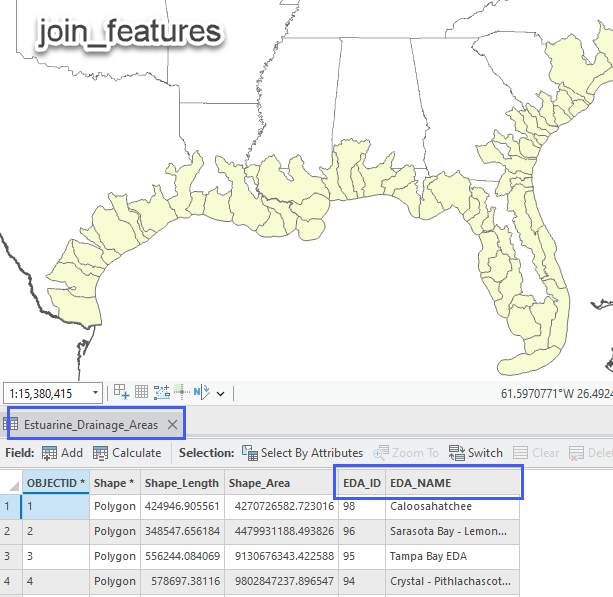

 ### Step 3. Adding 8-digit hydrologic unit codes

In [42]:
# Step 3. Add 8-digit hydrologic unit codes; target_features file is the output from step 2.

arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\WBDHU8",
    out_feature_class=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,H3_5_St_Cnty_EDA,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,'
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,'
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,'
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,'
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,'
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,'
                  'EDA_NAME,0,100;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Area,-1,-1;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,join_feature,HUC_8,0,8',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)

<Result 'K:\\projects\\rgmg\\\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA_WB8'>

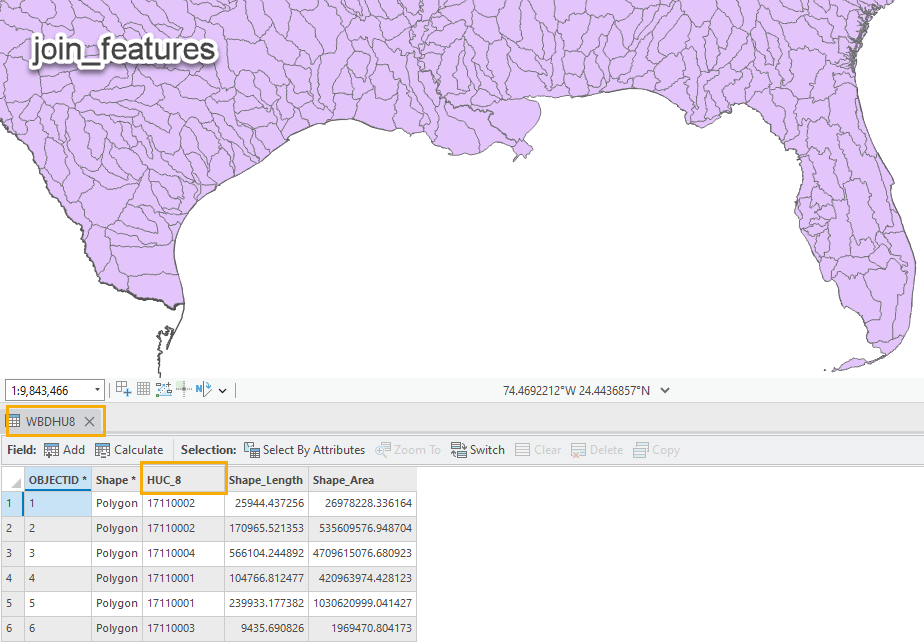

 ### Step 4. Adding 12-digit hydrologic unit codes

In [59]:
# Step 4. Add 12-digit hydrologic unit codes; target_features file is the output from step 3.

arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\WBDHU12",
    out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,target_features,' 
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,' 
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,' 
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,' 
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,' 
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,' 
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,' 
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,' 
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,' 
                  'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,target_features,' 
                  'HUC_8,0,8;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,' 
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,' 
                  'Shape_Area,-1,-1;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,join_features,HUC_12,0,12',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)

<Result 'K:\\projects\\rgmg\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA_WB8_WB12'>

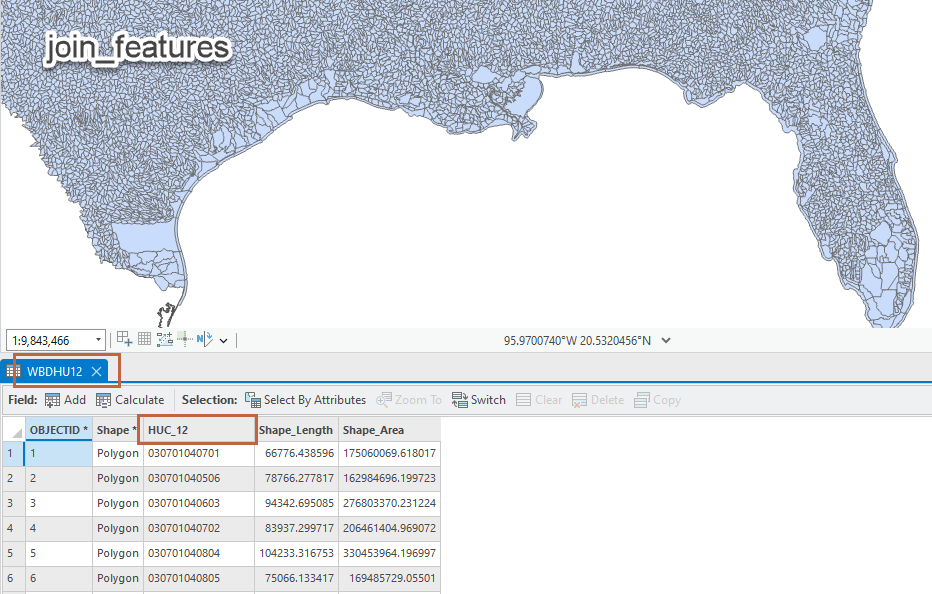

### Step 5. Adding land/water and population density information

In [60]:
# Step 5. Add FIPS_Lnd_Wtr and POP_SQMI fields, target_features file is the output from step 4.
# This step calculates the population density and GEOID_Land (inside of the land area in the US counties)

arcpy.analysis.SpatialJoin(
    target_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
    join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\dtl_cnty_Census_ESRI",
    out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    join_operation="JOIN_ONE_TO_ONE",
    join_type="KEEP_ALL",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,target_features,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,'
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,'
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,'
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,'
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,'
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,'
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,'
                  'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,target_features,'
                  'HUC_8,0,8;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,target_features,'
                  'HUC_12,0,12;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,'
                  'Shape_Area,-1,-1;POP_SQMI "POP_SQMI" true true false 8 Double 0 0,First,#,'
                  'join_features,POP_SQMI,-1,-1;FIPS_Lnd_Wtr "FIPS_Land_Wtr" true true false 15 Text 0 0,First,#,'
                  'join_features,FIPS_Lnd_Wtr,0,15',
    match_option="HAVE_THEIR_CENTER_IN",
    search_radius=None,
    distance_field_name=""
)
# The DeleteField function is used to remove the extra fields created during the join.
arcpy.management.DeleteField(
    in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    drop_field="Join_Count;TARGET_FID",
    method="DELETE_FIELDS"
)
# replace the null values for 'GEO_ID' and 'FIPS_Lnd_Wtr' fields with "" 
# the null values create problems for the field calculation operation 

path = r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr"

fieldNames = ['GEO_ID','FIPS_Lnd_Wtr']  
fieldCount = len(fieldNames)  

with arcpy.da.UpdateCursor(path, fieldNames) as curU:  
    for row in curU:  
        rowU = row  
        for field in range(fieldCount):  
            if rowU[field] == None:  
                rowU[field] = ""  
      
      
        curU.updateRow(rowU)

del curU

# The CalculateField function is used to complete the 'FIPS_Lnd_Wtr' field
# The attributes "GEOID_Water" and "Water" are calculated based on the already existing GEO_ID and FIPS_Lnd_Wtr attributes
arcpy.management.CalculateField(
    in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    field="FIPS_Lnd_Wtr",
    expression="attr(!GEO_ID!, !FIPS_Lnd_Wtr!)",
    expression_type="PYTHON3",
    code_block="""def attr(GEO_ID, FIPS_Lnd_Wtr):
    if FIPS_Lnd_Wtr != "":
         return FIPS_Lnd_Wtr
    if FIPS_Lnd_Wtr == "" and GEO_ID != "":
        return GEO_ID + "_Water"
    if FIPS_Lnd_Wtr == "" and GEO_ID == "":
        return "Water" """,
    field_type="TEXT",
    enforce_domains="NO_ENFORCE_DOMAINS"
)

<Result 'K:\\projects\\rgmg\\MSGeoProject\\Projects\\Grid_Effort\\H3_5_10_Grd.gdb\\Temp\\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr'>

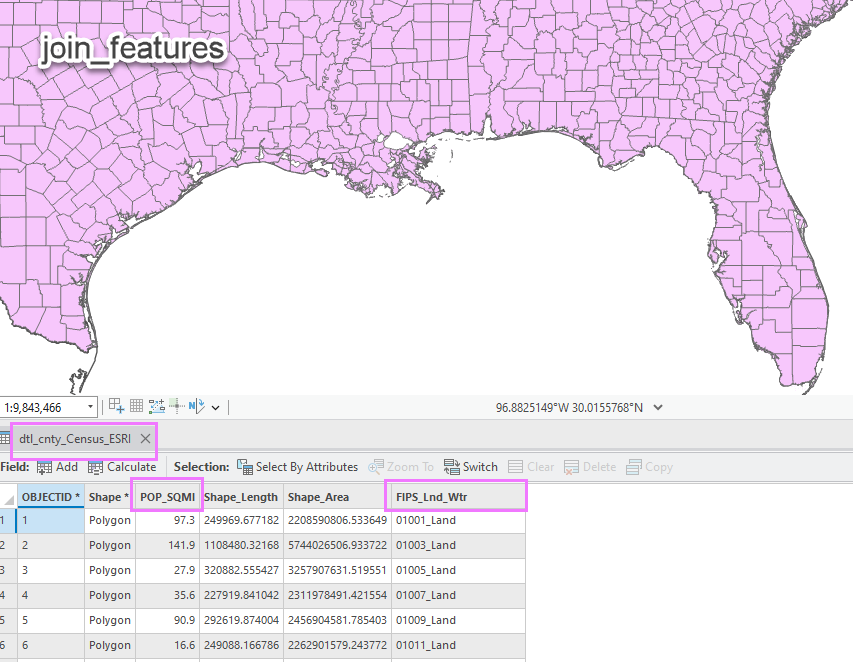

### Step 6. Replacing the null values with "" (for the text fields) and -999 (for the population density field). Exporting the final output layer

In [62]:
# replace the "null" values for text fields with "" 
path = r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr"

fieldTxt = ['STATE_FP','STATE_AB','STATE_NM','COUNTY_FP', 'CNTY_NAME', 'EDA_ID', 'EDA_NAME', 'HUC_8', 'HUC_12', 'FIPS_Lnd_Wtr'] 
fieldTxtCount = len(fieldTxt)  

with arcpy.da.UpdateCursor(path, fieldTxt) as curU:  
    for row in curU:  
        rowU = row  
        for field in range(fieldTxtCount):  
            if rowU[field] == None:  
                rowU[field] = ""  
      
      
        curU.updateRow(rowU)

del curU

# replace the "null" values for the POP_SQMI field with -999
fieldDb = ['POP_SQMI']  
fieldDbCount = len(fieldDb)  

with arcpy.da.UpdateCursor(path, fieldDb) as curU:  
    for row in curU:  
        rowU = row  
        for field in range(fieldDbCount):  
            if rowU[field] == None:  
                rowU[field] = -999  
      
      
        curU.updateRow(rowU)

del curU

# export the H3 layer with reference attributes to the permanent feature dataset
arcpy.conversion.ExportFeatures(
    in_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
    out_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\H3_Grds_Reference_Flds\H3_5_ref_flds",
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#, in_features,'
                  'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,in_features,'
                  'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,in_features,'
                  'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,in_features,'
                  'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,in_features,'
                  'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,in_features,'
                  'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,in_features,'
                  'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,in_features,'
                  'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,in_features,'
                  'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,in_features,'
                  'HUC_8,0,8;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,in_features,'
                  'HUC_12,0,12;POP_SQMI "POP_SQMI" true true false 8 Double 0 0,First,#,in_features,'
                  'POP_SQMI,-1,-1;FIPS_Lnd_Wtr "FIPS_Land_Wtr" true true false 15 Text 0 0,First,#,in_features,'
                  'FIPS_Lnd_Wtr,0,15;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,in_features,'
                  'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,in_features,Shape_Area,-1,-1',
    sort_field=None
)


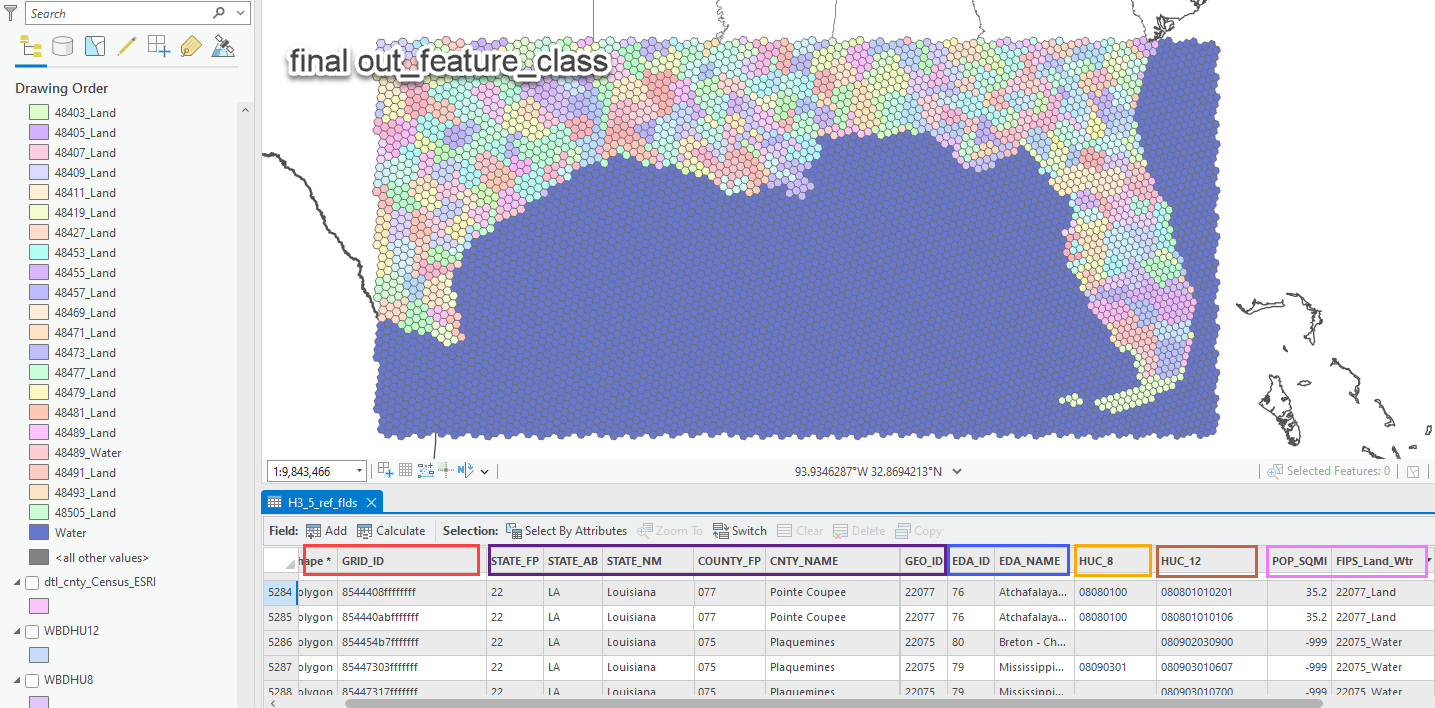